# Röntgen-Datenbanken

_Version 2, Nov. 2022:  
Wolfgang Malzer, wolfgang.malzer@tu-berlin.de, www.axp.tu-berlin.de  
Robin Krüger_

Im Folgenden werden einige Beispiele zur Verwendung von Röntgen-Datenbanken gegeben. Dabei wird sowohl die Verwendung von _XrayLib_ als auch _xraydb_ eingeführt.

In [2]:
# dann erst mal die Bibliotheken, die wir immer nutzen importiern
import numpy as np
import matplotlib.pyplot as plt

# Verwendung von Kommata als Dezimaltrenner in den Abbildungen
import locale
locale.setlocale(locale.LC_NUMERIC, "de_DE")
plt.rcParams["axes.formatter.use_locale"] = True

# ggf. Verwendung von LaTeX zum Erstellen der Abbildungen
plt.rcParams["text.usetex"] =  False

## XrayLib

Mit dieser Bibliothek können röntgenphysikalische Rechnungen durchgeführt werden.
Dieses Skript enthält die Referenz zur xraylib, d.h. wo man sie findet und wie man sie installiert, sowie einige Beispiele. 
 
Zur Nutzung werden schon Kenntnisse in python und der Nutzung des Jupyter Notebooks vorausgesetzt.
 
Die Bibliothek xraylib enthält Funktionen für die Berechnung von Absorption, Linienenergien, etc.
Die Dokumentation zur xraylib findet ihr unter:
https://github.com/tschoonj/xraylib/wiki
inklusive der API - Application Programmers Interface, 
d.h. alle Funktionsaufrufe und wie man sie benutzt
und der Installationsanleitung.

Installation unter Anaconda: 

``conda install -c conda-forge xraylib=4.1.0``


In [7]:
import xraylib as xrl

### Atomare Masse

In [8]:
# Ein Beispiel, Atomare Masse von Eisen
Z = xrl.SymbolToAtomicNumber("Fe")
AtomWeight = xrl.AtomicWeight(Z)
print("Die atomare Masse von Fe ist " +  str(AtomWeight))

Die atomare Masse von Fe ist 55.85


### Comptonverschiebung

In [5]:
# Beispiel Comptonverschiebung
# Streuwinkel Theta, Umrechnung von grad in rad
Theta = 45 * np.pi/180
# Die Energie sei 6 keV
ComptEnergie = xrl.ComptonEnergy(6.0, Theta)
print("Die Energie eines Photons mit einer Energie von 6 keV, das unter 45° gestreut wird ist: " + str(ComptEnergie))

Die Energie eines Photons mit einer Energie von 6 keV, das unter 45° gestreut wird ist:5.979436320649443


### Absorption

In [11]:
# Beispiel Absorption
# Wie groß ist die Schwächung von Strahlung mit 6 keV durch 100 µm Kohlenstoff mit Dichte 1 g/cm3?
E = 6 # Die Photonenergie
Z = xrl.SymbolToAtomicNumber("C") # die Ordnungszahl des Absorbers
d = 0.01 # Die Dicke des Absorbers, muss in cm angegeben werden, da Wirkungsquerschnitte in cm^2/g ausgegeben werden
rho = 1.0 # Die Dichte in g/cm3
# Benutzt wird das Lambert-Beer Gesetz: I/I0 = epx(-µ * rho * d)
mue = xrl.CS_Total(Z, E) # Wechselwirkungsquerschnitt in cm^2/g
transmission = np.exp(-mue * rho * d)
print("Die Schwächung ist: {:.1%}".format(1 - transmission))

Die Schwächung ist: 10.4%


### Transmission

In [20]:
# und jetzt die Transmission durch Wasser
AtomWeight_O = xrl.AtomicWeight(8)
AtomWeight_H = xrl.AtomicWeight(1)
Anteil_O = AtomWeight_O/(AtomWeight_O + 2 * AtomWeight_H)
mue = Anteil_O * xrl.CS_Total(8, E) + (1-Anteil_O) * xrl.CS_Total(1, E)
rho = 1.0 # 1 g/cm^3.
d = 0.01
transmission = np.exp(-mue * rho * d)
print("Die Schwächung ist: {:.3f}".format(1 - transmission))

Die Schwächung ist: 0.218


### Differentieller Wirkungsquerschnitt

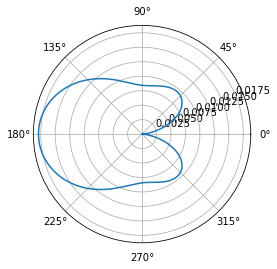

In [8]:
# plot the differential cross section (proportional to scatter intensity) for compton scattering
ScatAngle = np.linspace(0.01, 2 * np.pi-0.01, 400) # die xraylib ist etwas zickig, Winkel von 0°, bzw 180° produzieren
E = 8.0 # Energie einfallende Strahlung              unverständliche Fehlermeldungen
Z = 6 # Kohlenstoff als Streuer
# leider stellt die xraylib keine ufuncs zur Verfügung, man muss komponentenweise rechnen
DiffComptonCS = np.zeros(len(ScatAngle)) 
for i in range(len(ScatAngle)):
    DiffComptonCS[i] = xrl.DCS_Compt(Z, E, ScatAngle[i])
plt.polar(ScatAngle, DiffComptonCS)

## XrayDB

Mit dieser Bibliothek kann auf röntgenphysikalische Größen zugegriffen werden.

Die Dokumentation zur xraylib findet ihr unter:
https://xraypy.github.io/XrayDB/

Installation unter Anaconda: 

``conda install -c gsecars xraydb``

Installation mit Pip:

``pip install xraydb``

In [3]:
# Import der Bibliothek
import xraydb as db

### Atomare Masse
Atomare Masse von Eisen:

In [42]:
print("Die atomare Masse von Fe ist",  db.atomic_mass('Fe'))

Die atomare Masse von Fe ist 55.845


### Absorption
Wie groß ist die Schwächung von Strahlung mit 6 keV durch 100 µm Kohlenstoff mit Dichte 1 g/cm3?

In [43]:
E = 6 # die Photonenergie
d = 0.01 # die Dicke des Absorbers, muss in cm angegeben werden, da Wirkungsquerschnitte in cm^2/g ausgegeben werden
rho = 1.0 # die Dichte in g/cm3
# Benutzt wird das Lambert-Beer Gesetz: I/I0 = epx(-µ * rho * d)
mue = db.mu_elam('C', E*1e3) # Wechselwirkungsquerschnitt in cm^2/g
transmission = np.exp(-mue * rho * d)
print("Die Schwächung ist: {:.1%}".format(1 - transmission))

Die Schwächung ist: 10.4%


### Transmission
Und jetzt die Transmission durch Wasser:

In [44]:
mue = db.material_mu('H2O', E*1e3) # das gibt direkt den Absorptionskoeffizienten
d = 0.01
transmission = np.exp(-mue * d)
print("Die Schwächung ist: {:.3f}".format(1 - transmission))

Die Schwächung ist: 0.218


### Transmissionsspektrum
Transmission durch verschiedene Filter mit 20 µm Dicke:

Text(0.5, 0, 'Energie in keV')

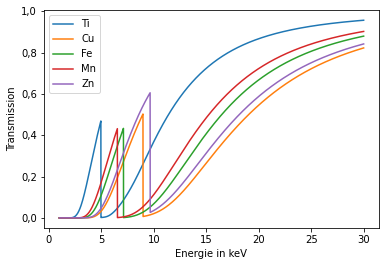

In [29]:
element_list = ['Ti','Cu','Fe','Mn','Zn']
energies = np.arange(1, 30,0.01)
for element in element_list:
    thickness = 0.002 # in cm 
    T =  np.exp(-thickness*db.atomic_density(element)*db.mu_elam(element,energies*1000))
    plt.plot(energies,T,label=element)
plt.legend()
plt.ylabel('Transmission')
plt.xlabel('Energie in keV')

### Brechungsindex

Energieabhängiger Brechungsindex von Silizium:


Text(10, 1e-05, '$n = 1- \\delta + i \\beta$')

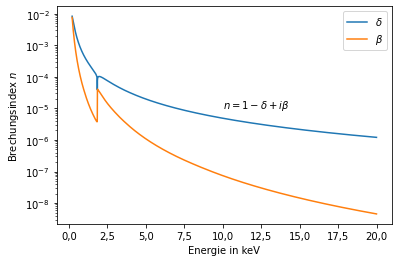

In [46]:
element = 'Si'
density =  db.atomic_density(element)
energies = np.arange(0.2,20,0.001)

delta, beta, mulen = db.xray_delta_beta(element, density, energies*1000)

plt.plot(energies, delta, label=r'$\delta$')
plt.plot(energies, beta, label=r'$\beta$')
plt.legend()
plt.ylabel(r'Brechungsindex $n$')
plt.xlabel('Energie in keV')
plt.yscale('log')
plt.text(10,1e-5,r'$n = 1- \delta + i \beta$')

### Absorptionskanten
Absorptionskanten von Eisen:

In [38]:
db.xray_edges('Fe')

{'K': XrayEdge(energy=7112.0, fyield=0.350985, jump_ratio=7.893),
 'L1': XrayEdge(energy=844.6, fyield=0.001, jump_ratio=1.1289),
 'L2': XrayEdge(energy=719.9, fyield=0.0036, jump_ratio=1.4),
 'L3': XrayEdge(energy=706.8, fyield=0.0063, jump_ratio=3.099),
 'M1': XrayEdge(energy=91.3, fyield=2.8e-06, jump_ratio=1.0),
 'M2': XrayEdge(energy=52.7, fyield=1.6e-05, jump_ratio=1.0),
 'M3': XrayEdge(energy=52.7, fyield=0.0, jump_ratio=1.0),
 'M4': XrayEdge(energy=2.0, fyield=0.00219375, jump_ratio=1.0),
 'M5': XrayEdge(energy=2.0, fyield=0.0, jump_ratio=1.0)}